# Setup data and libraries

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pandas as pd
import os
import matplotlib.pyplot as plt
import ppscore as pps
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

In [58]:
train_set = pd.read_csv("./train.csv")
stores = pd.read_csv("./stores.csv")
features = pd.read_csv("./features.csv")

In [59]:
#we can marge the store information  and features into the training dataset to work it together

df = train_set.merge(stores, how='left').merge(features, how='left')

Change Is Holiday to Boolean
Add dummies for types A B
Add weeks since column

# Treatment Phase

In [60]:
#Substitute NA for zeroes
df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)

In [61]:
#Transform date column into datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [62]:
#Add month Column
df['Month'] = pd.to_datetime(df['Date']).dt.month

In [63]:
#Add year Column
df['Year'] = pd.to_datetime(df['Date']).dt.year

In [94]:
df['YearWeek'] = df.Date.dt.week 

In [64]:
#Add Week column
df['Week'] = (df['Date'] - df["Date"].min())/np.timedelta64(1,'W')

In [65]:
#Transform Type Column into booleans
df = pd.get_dummies(df, columns=["Type"])

In [66]:
#Drop one of the dummies
df = df.drop(["Type_C"], axis=1)

In [67]:
#Convert IsHoliday to binary
df["IsHoliday"] = df["IsHoliday"].astype(int)

In [68]:
#reorder columns for readability
cols = ['Weekly_Sales',
        'Store',
        'Dept',
        'Size',
        'Type_A',
        'Type_B',
        'Date',
        'Year',
        'Month',
        'Week',
        'IsHoliday',
        'Temperature',
        'Fuel_Price',
        'CPI',
        'Unemployment',
        'MarkDown1',
        'MarkDown2',
        'MarkDown3',
        'MarkDown4',
        'MarkDown5']

df = df[cols]

# Exploration Phase

In [89]:
df

,Weekly_Sales,Store,Dept,Size,Type_A,Type_B,Date,Year,Month,Week,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,24924.50,1,1,151315,1,0,2010-02-05,2010,2,0.0,0,42.31,2.572,211.096358,8.106,0.00,0.00,0.00,0.00,0.00
1,46039.49,1,1,151315,1,0,2010-02-12,2010,2,1.0,1,38.51,2.548,211.242170,8.106,0.00,0.00,0.00,0.00,0.00
2,41595.55,1,1,151315,1,0,2010-02-19,2010,2,2.0,0,39.93,2.514,211.289143,8.106,0.00,0.00,0.00,0.00,0.00
3,19403.54,1,1,151315,1,0,2010-02-26,2010,2,3.0,0,46.63,2.561,211.319643,8.106,0.00,0.00,0.00,0.00,0.00
4,21827.90,1,1,151315,1,0,2010-03-05,2010,3,4.0,0,46.50,2.625,211.350143,8.106,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,508.37,45,98,118221,0,1,2012-09-28,2012,9,138.0,0,64.88,3.997,192.013558,8.684,4556.61,20.64,1.50,1601.01,3288.25
421566,628.10,45,98,118221,0,1,2012-10-05,2012,10,139.0,0,64.89,3.985,192.170412,8.667,5046.74,0.00,18.82,2253.43,2340.01
421567,1061.02,45,98,118221,0,1,2012-10-12,2012,10,140.0,0,54.47,4.000,192.327265,8.667,1956.28,0.00,7.89,599.32,3990.54
421568,760.01,45,98,118221,0,1,2012-10-19,2012,10,141.0,0,56.47,3.969,192.330854,8.667,2004.02,0.00,3.18,437.73,1537.49


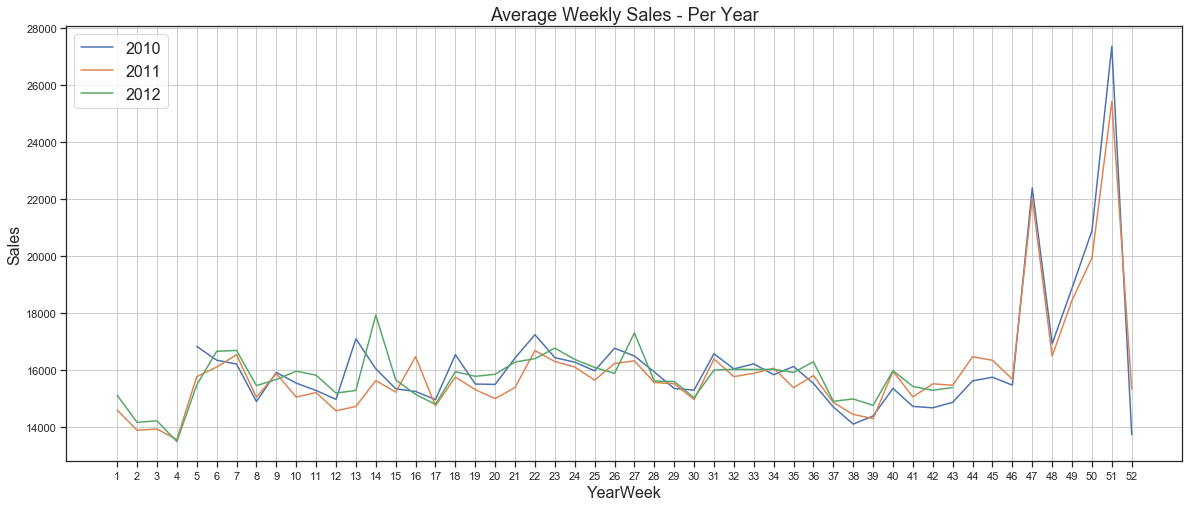

In [95]:
weekly_sales_2010 = df[df.Year==2010]['Weekly_Sales'].groupby(df['YearWeek']).mean()
weekly_sales_2011 = df[df.Year==2011]['Weekly_Sales'].groupby(df['YearWeek']).mean()
weekly_sales_2012 = df[df.Year==2012]['Weekly_Sales'].groupby(df['YearWeek']).mean()

plt.figure(figsize=(20,8))
sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values)
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values)
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values)
plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Weekly Sales - Per Year', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('YearWeek', fontsize=16)
plt.show()

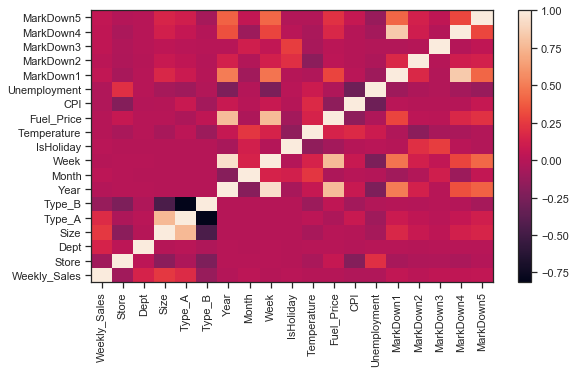

In [69]:
fig = plt.figure(figsize=(9, 5))
corr = df.corr()
c = plt.pcolor(corr)
plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index)
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns,rotation=)
fig.colorbar(c)

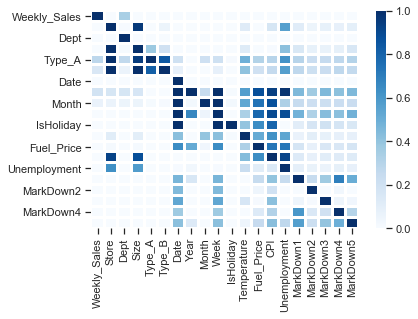

In [70]:
pps_matrix = pps.matrix(df)
sns.heatmap(pps_matrix, vmin=0, vmax=1, cmap="Blues", linewidths=2)

# Modeling Phase

In [71]:
date_cols = ['Year',
             'Month',
             'Week',
             'IsHoliday']

mark_cols = ['MarkDown1',
             'MarkDown2',
             'MarkDown3',
             'MarkDown4',
             'MarkDown5']

stor_cols = ['Store',
             'Dept',
             'Size',
             'Type_A',
             'Type_B']

exte_cols = ['Temperature',
             'Fuel_Price',
             'CPI',
             'Unemployment']

target = ["Weekly_Sales"]

In [72]:
X = df[stor_cols+date_cols+exte_cols+mark_cols]
y = df[target]

In [73]:
#split sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Feature Selection Phase
